In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import csv
import os
from glob import glob
import scipy.io.wavfile
import matplotlib.pyplot as plt
import pywt
import shutil
from pywt import wavedec

In [ ]:
drive.mount('/content/drive')
path_base = "/content/drive/MyDrive/Data Tugas Akhir"
Preprocess_mi = f'{path_base}{os.sep}Preprocess_MI/'
Extracted_wavelet = f'{path_base}{os.sep}Wavelet_Extracted_MI/'
audio_files_mi = glob(Preprocess_mi  + '*.wav')

Mounted at /content/drive


In [ ]:
def wavelet_extraction(data, coeff, dwt, db, level):
    N = np.array(data).size
    a, ds = dwt[0], list(reversed(dwt[1:]))

    if coeff =='a':
        return pywt.upcoef('a', a, db, level=level)[:N]
    elif coeff == 'd':
        return pywt.upcoef('d', ds[level-1], db, level=level)[:N]
    else:
        raise ValueError("Invalid coefficients: {}".format(coeff))

In [ ]:
features_wavelet = []
wavelet_file = []
count = 1
db = 'db6'
level = 4
directory = Preprocess_mi
for audio in os.listdir(directory):
    audio_path = directory+audio
    data_wave, sr = librosa.load(audio_path, res_type='kaiser_best')
    coeffs = pywt.wavedec(data_wave, db, level=level)
    A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
    D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
    D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
    D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
    D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
    wavelets = A4 + D4 + D3 + D2 + D1
    file_name = "Extracted_wavelet_MI_%s.csv" % count
    pd.DataFrame(wavelets).to_csv(file_name)
    wavelet_file.append(file_name)
    features_wavelet.append(wavelets)
    count = count+1

In [ ]:
wavelet_file

['Extracted_wavelet_MI_1.csv',
 'Extracted_wavelet_MI_2.csv',
 'Extracted_wavelet_MI_3.csv',
 'Extracted_wavelet_MI_4.csv',
 'Extracted_wavelet_MI_5.csv',
 'Extracted_wavelet_MI_6.csv',
 'Extracted_wavelet_MI_7.csv',
 'Extracted_wavelet_MI_8.csv',
 'Extracted_wavelet_MI_9.csv',
 'Extracted_wavelet_MI_10.csv',
 'Extracted_wavelet_MI_11.csv',
 'Extracted_wavelet_MI_12.csv',
 'Extracted_wavelet_MI_13.csv',
 'Extracted_wavelet_MI_14.csv',
 'Extracted_wavelet_MI_15.csv',
 'Extracted_wavelet_MI_16.csv',
 'Extracted_wavelet_MI_17.csv',
 'Extracted_wavelet_MI_18.csv',
 'Extracted_wavelet_MI_19.csv',
 'Extracted_wavelet_MI_20.csv',
 'Extracted_wavelet_MI_21.csv',
 'Extracted_wavelet_MI_22.csv',
 'Extracted_wavelet_MI_23.csv',
 'Extracted_wavelet_MI_24.csv',
 'Extracted_wavelet_MI_25.csv',
 'Extracted_wavelet_MI_26.csv',
 'Extracted_wavelet_MI_27.csv',
 'Extracted_wavelet_MI_28.csv',
 'Extracted_wavelet_MI_29.csv',
 'Extracted_wavelet_MI_30.csv',
 'Extracted_wavelet_MI_31.csv',
 'Extracted_wavel

In [ ]:
base_directory = "/content"
for f in wavelet_file:
    src_path = os.path.join(base_directory, f)
    dst_path = os.path.join(Extracted_wavelet, f)
    shutil.move(src_path, dst_path)

In [ ]:
features_wavelet

[array([ 1.2073227e-07,  5.3538338e-07,  8.6136635e-07, ...,
        -8.3281165e-08,  2.3431078e-07,  4.1516535e-07], dtype=float32),
 array([-1.0157557e-08, -4.5043365e-08, -1.5066661e-07, ...,
         3.5533697e-06,  5.1151546e-06,  3.2429539e-06], dtype=float32),
 array([ 1.0432173e-10,  4.6261139e-10,  2.7763994e-10, ...,
        -3.3291296e-06, -3.5766614e-06, -2.6544026e-06], dtype=float32),
 array([-6.9932806e-09, -3.1011496e-08, -1.5299811e-07, ...,
         1.2699323e-05,  1.5331718e-05,  1.9993661e-06], dtype=float32),
 array([-2.4223244e-08, -1.0741725e-07, -6.2686473e-07, ...,
         5.2376612e-07,  3.5843789e-07, -4.8484003e-07], dtype=float32),
 array([ 7.4101475e-10,  3.2860061e-09, -3.5204188e-09, ...,
         4.6179666e-05,  4.7059573e-05,  4.3237971e-05], dtype=float32),
 array([-5.6128542e-09, -2.4890019e-08,  6.2009669e-08, ...,
        -9.4594470e-06, -9.6019694e-06, -5.1545599e-06], dtype=float32),
 array([-5.6706487e-08, -2.5146312e-07, -1.1571792e-06, ...,
 

**MEAN**

In [ ]:
wavelet_means = []
for i in features_wavelet:
  mean = np.mean(i)
  wavelet_means.append(mean)

In [ ]:
df_mean = pd.DataFrame(wavelet_means, columns=['Mean'])
df_mean

,Mean
0,-1.140296e-07
1,-3.237428e-08
2,3.716743e-08
3,1.435873e-09
4,1.692980e-08
...,...
275,-3.866203e-08
276,7.044467e-09
277,-1.093870e-08
278,2.153113e-09


**STD**

In [ ]:
wavelet_std = []
for i in features_wavelet:
  std = np.std(i)
  wavelet_std.append(std)

In [ ]:
df_std = pd.DataFrame(wavelet_std, columns=['Std'])
df_std

,Std
0,0.000368
1,0.000409
2,0.000296
3,0.000511
4,0.000206
...,...
275,0.000644
276,0.000270
277,0.000329
278,0.000132


**MAX**

In [ ]:
wavelet_max = []
for i in features_wavelet:
  max = np.max(i)
  wavelet_max.append(max)

In [ ]:
df_max = pd.DataFrame(wavelet_max, columns=['Max'])
df_max

,Max
0,0.005660
1,0.004027
2,0.004981
3,0.010863
4,0.003113
...,...
275,0.012823
276,0.010633
277,0.005776
278,0.002568


**MIN**

In [ ]:
wavelet_Min = []
for i in features_wavelet:
  min = np.min(i)
  wavelet_Min.append(min)

In [ ]:
df_min = pd.DataFrame(wavelet_Min, columns=['Min'])
df_min

,Min
0,-0.005296
1,-0.004133
2,-0.007905
3,-0.008997
4,-0.003379
...,...
275,-0.016201
276,-0.007747
277,-0.009169
278,-0.001801


**MED**

In [ ]:
wavelet_Med = []
for i in features_wavelet:
  Med = np.median(i)
  wavelet_Med.append(Med)

In [ ]:
df_med = pd.DataFrame(wavelet_Med, columns=['Med'])
df_mean

,Mean
0,-1.140296e-07
1,-3.237428e-08
2,3.716743e-08
3,1.435873e-09
4,1.692980e-08
...,...
275,-3.866203e-08
276,7.044467e-09
277,-1.093870e-08
278,2.153113e-09


**VAR**

In [ ]:
wavelet_Var = []
for i in features_wavelet:
  Var = np.var(i)
  wavelet_Var.append(Var)

In [ ]:
df_var = pd.DataFrame(wavelet_Var, columns=['Var'])
df_var

,Var
0,1.351754e-07
1,1.672393e-07
2,8.746432e-08
3,2.614613e-07
4,4.239165e-08
...,...
275,4.144554e-07
276,7.268914e-08
277,1.080994e-07
278,1.750877e-08


**SKEW**

In [ ]:
from scipy.stats import skew

In [ ]:
wavelet_Skew = []
for i in features_wavelet:
  Skew = skew(i, axis=0, bias=True)
  wavelet_Skew.append(Skew)

In [ ]:
skew_means = []
for i in wavelet_Skew:
  mean = np.mean(i)
  skew_means.append(mean)

In [ ]:
df_skew = pd.DataFrame(skew_means, columns=['Skew'])
df_skew

,Skew
0,-0.526047
1,-0.467733
2,-0.233113
3,0.093306
4,-0.049948
...,...
275,-1.820804
276,2.874972
277,-1.282230
278,1.222098


**Q1**

In [ ]:
wavelet_Q1 = []
for i in features_wavelet:
  Q1 = np.percentile(i, 25)
  wavelet_Q1.append(Q1)

In [ ]:
df_q1 = pd.DataFrame(wavelet_Q1, columns=['Q1'])
df_q1

,Q1
0,-6.491013e-07
1,-2.533549e-06
2,-1.128254e-06
3,-2.598059e-06
4,-4.891431e-07
...,...
275,-2.231395e-07
276,-2.881598e-07
277,-4.867813e-07
278,-6.360359e-07


**Q3**

In [ ]:
wavelet_Q3 = []
for i in features_wavelet:
  Q3 = np.percentile(i, 75)
  wavelet_Q3.append(Q3)

In [ ]:
df_q3 = pd.DataFrame(wavelet_Q3, columns=['Q3'])
df_q3

,Q3
0,6.968827e-07
1,2.624170e-06
2,1.141965e-06
3,2.369187e-06
4,4.654809e-07
...,...
275,2.643018e-07
276,2.912042e-07
277,4.966234e-07
278,6.413088e-07


**IQR**

In [ ]:
wavelet_IQR = []
IQR = np.array(wavelet_Q3) - np.array(wavelet_Q1)
wavelet_IQR.append(IQR)

In [ ]:
df_iqr = pd.DataFrame(wavelet_IQR)
df_iqr = df_iqr.transpose()

**RANGE**

In [ ]:
wavelet_range = []
Range = np.array(wavelet_max) - np.array(wavelet_Min)
wavelet_range.append(Range)

In [ ]:
df_range = pd.DataFrame(wavelet_range)
df_range = df_range.transpose()

**KURTOSIS**

In [ ]:
from scipy.stats import kurtosis

In [ ]:
wavelet_Kurt = []
for i in features_wavelet:
  Kurt = kurtosis(i, axis=0, bias=True)
  wavelet_Kurt.append(Kurt)

In [ ]:
kurt_means = []
for i in wavelet_Kurt:
  mean = np.mean(i)
  kurt_means.append(mean)

In [ ]:
df_kurt = pd.DataFrame(kurt_means, columns=['Kurt'])
df_kurt

,Kurt
0,64.324412
1,23.393347
2,60.637048
3,58.236027
4,48.848373
...,...
275,160.049238
276,220.130953
277,164.803097
278,55.052190


**PENGGABUNGAN**

In [ ]:
df_wavelet = pd.DataFrame()
df_wavelet['Mean_wavelet'] = df_mean['Mean']
df_wavelet['Std_wavelet'] = df_std['Std']
df_wavelet['Max_wavelet'] = df_max['Max']
df_wavelet['Min_wavelet'] = df_min['Min']
df_wavelet['Med_wavelet'] = df_med['Med']
df_wavelet['Var_wavelet'] = df_var['Var']
df_wavelet['Skew_wavelet'] = df_skew['Skew']
df_wavelet['Q1_wavelet'] = df_q1['Q1']
df_wavelet['Q3_wavelet'] = df_q3['Q3']
df_wavelet['IQR_wavelet'] = df_iqr[0]
df_wavelet['MinMax_wavelet'] = df_range[0]
df_wavelet['Kurt_wavelet'] = df_kurt['Kurt']
df_wavelet

,Mean_wavelet,Std_wavelet,Max_wavelet,Min_wavelet,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet
0,-1.140296e-07,0.000368,0.005660,-0.005296,7.366450e-09,1.351754e-07,-0.526047,-6.491013e-07,6.968827e-07,1.345984e-06,0.010956,64.324412
1,-3.237428e-08,0.000409,0.004027,-0.004133,1.300959e-09,1.672393e-07,-0.467733,-2.533549e-06,2.624170e-06,5.157720e-06,0.008160,23.393347
2,3.716743e-08,0.000296,0.004981,-0.007905,1.183576e-09,8.746432e-08,-0.233113,-1.128254e-06,1.141965e-06,2.270219e-06,0.012886,60.637048
3,1.435873e-09,0.000511,0.010863,-0.008997,5.162848e-10,2.614613e-07,0.093306,-2.598059e-06,2.369187e-06,4.967246e-06,0.019861,58.236027
4,1.692980e-08,0.000206,0.003113,-0.003379,-1.464605e-09,4.239165e-08,-0.049948,-4.891431e-07,4.654809e-07,9.546240e-07,0.006492,48.848373
...,...,...,...,...,...,...,...,...,...,...,...,...
275,-3.866203e-08,0.000644,0.012823,-0.016201,1.426908e-21,4.144554e-07,-1.820804,-2.231395e-07,2.643018e-07,4.874413e-07,0.029024,160.049238
276,7.044467e-09,0.000270,0.010633,-0.007747,-3.964177e-12,7.268914e-08,2.874972,-2.881598e-07,2.912042e-07,5.793640e-07,0.018380,220.130953
277,-1.093870e-08,0.000329,0.005776,-0.009169,2.475347e-09,1.080994e-07,-1.282230,-4.867813e-07,4.966234e-07,9.834047e-07,0.014945,164.803097
278,2.153113e-09,0.000132,0.002568,-0.001801,-7.646064e-11,1.750877e-08,1.222098,-6.360359e-07,6.413088e-07,1.277345e-06,0.004369,55.052190


In [ ]:
df_wavelet.to_csv("Wavelet_Feature Extraction_MI.csv")

**PLOT**

In [ ]:
path = Preprocess_mi + "Preprocessed_MI_3.wav"

In [ ]:
data_wave, sr = librosa.load(path, res_type='kaiser_fast')
coeffs = pywt.wavedec(data_wave, db, level=level)
A4 = wavelet_extraction(data_wave, 'a', coeffs, db, level)
D4 = wavelet_extraction(data_wave, 'd', coeffs, db, level)
D3 = wavelet_extraction(data_wave, 'd', coeffs, db, 3)
D2 = wavelet_extraction(data_wave, 'd', coeffs, db, 2)
D1 = wavelet_extraction(data_wave, 'd', coeffs, db, 1)
wavelets = A4 + D4 + D3 + D2 + D1

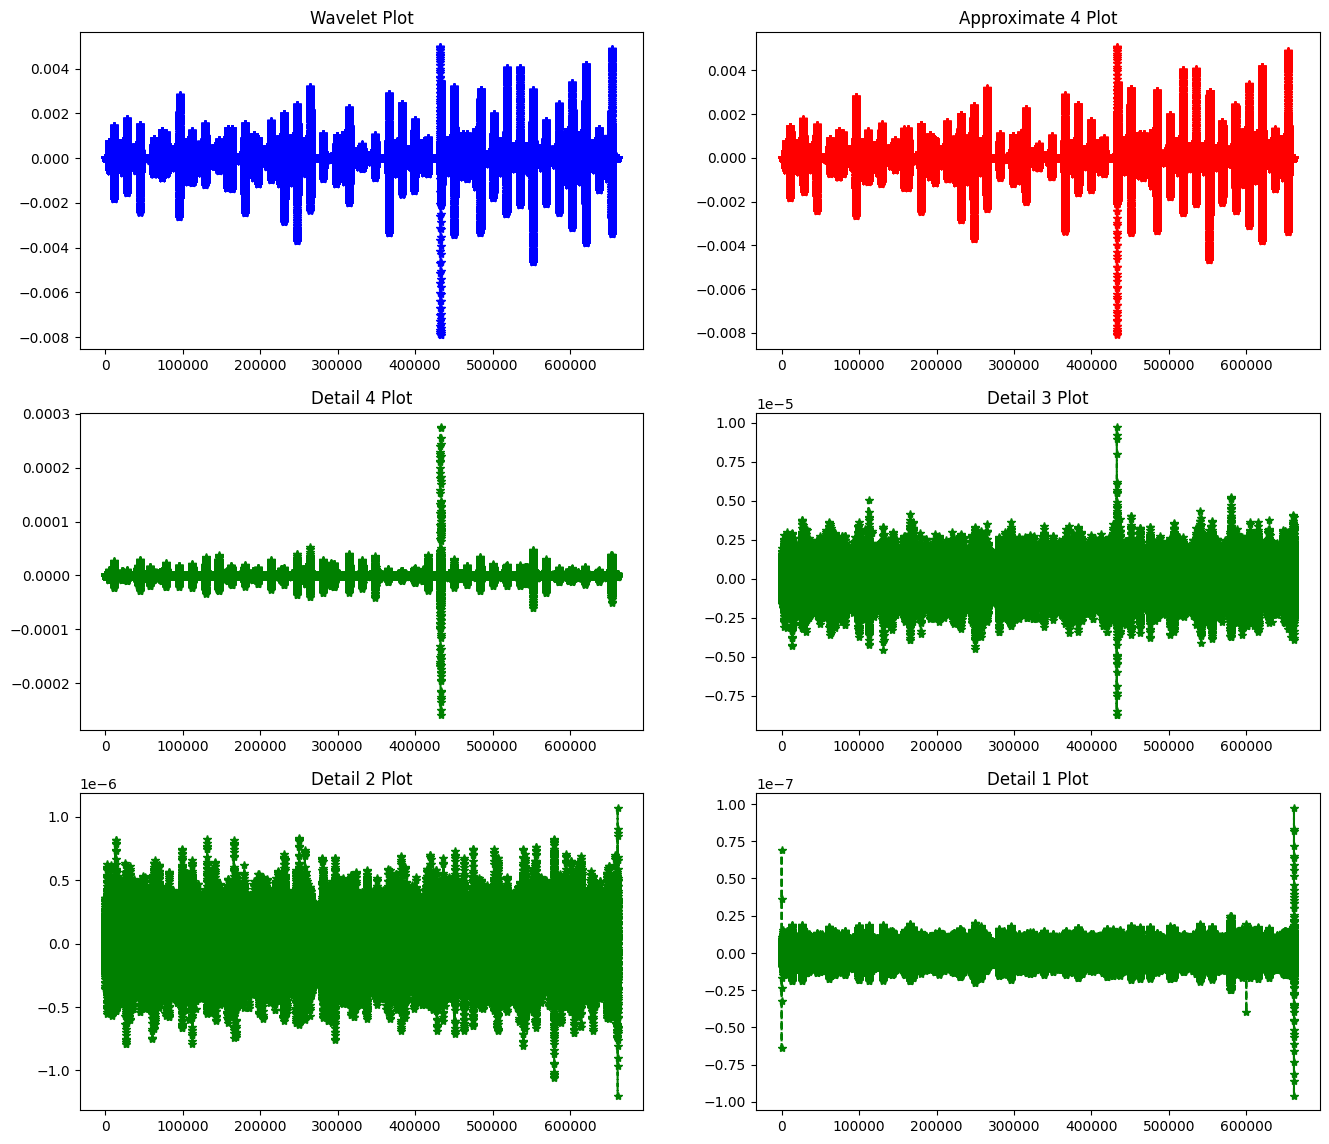

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(16,14))

axis[0, 0].plot(wavelets, '--*b')
axis[0, 0].set_title("Wavelet Plot")

axis[0, 1].plot(A4, '--*r')
axis[0, 1].set_title("Approximate 4 Plot")

axis[1, 0].plot(D4, '--*g')
axis[1, 0].set_title("Detail 4 Plot")

axis[1, 1].plot(D3, '--*g')
axis[1, 1].set_title("Detail 3 Plot")

axis[2, 0].plot(D2, '--*g')
axis[2, 0].set_title("Detail 2 Plot")

axis[2, 1].plot(D1, '--*g')
axis[2, 1].set_title("Detail 1 Plot")

plt.show()